# Youtube Trending Videos Analysis

This is the final project of the [Data Analysis with Python: Zero to Pandas] course. I chose the analyze a dataset consisting of the data of the trending youtube videos of the last few years. I got this data from Kaggle website. The data downloaded from kaggle consists of different countries data sets, but we are going to focus only in US and UK. Please take into account that this dataset is daily updated in Kaggle. I am performing the anaylisis in April 2022, so if this is ran at a different date the results will be different.  In order to make the analysis, I have mainly used Panda,Matplotlib and Seaborn python libraries. 


## Downloading the Dataset

The first part is to download the dataset from Kaggle website.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/rsrishav/youtube-trending-video-dataset?select=US_youtube_trending_data.csv'

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./youtube-trending-video-dataset" (use force=True to force download)


The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './youtube-trending-video-dataset/'

In [5]:
import os
os.listdir(data_dir)

['MX_category_id.json',
 'FR_category_id.json',
 'CA_youtube_trending_data.csv',
 'GB_youtube_trending_data.csv',
 'CA_category_id.json',
 'FR_youtube_trending_data.csv',
 'DE_category_id.json',
 'RU_category_id.json',
 'US_category_id.json',
 'KR_category_id.json',
 'DE_youtube_trending_data.csv',
 'JP_youtube_trending_data.csv',
 'RU_youtube_trending_data.csv',
 'US_youtube_trending_data.csv',
 'IN_youtube_trending_data.csv',
 'BR_category_id.json',
 'KR_youtube_trending_data.csv',
 'MX_youtube_trending_data.csv',
 'BR_youtube_trending_data.csv',
 'GB_category_id.json',
 'GB_category_trans.csv',
 'JP_category_id.json',
 'US_category_trans.csv',
 'IN_category_id.json']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "zerotopandas-Youtube-Trends" # change this (use lowercase letters and hyphens only)

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project="zerotopandas-Youtube-Trends")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "e-lasarte-z/zerotopandas-youtube-trends" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/e-lasarte-z/zerotopandas-youtube-trends


'https://jovian.ai/e-lasarte-z/zerotopandas-youtube-trends'

## Data Preparation and Cleaning

We are going to open panda dataframes with the Youtube trends in US and UK, since we will compare them later. The main data consists of csv files, which are easily readible with Pandas.  However, these csv files only have the categories as a number. The description of the category is in another json file. We will to need parse the content of the json files to be readable with pandas.


First, download the json

In [10]:
import json
f = open('./youtube-trending-video-dataset/US_category_id.json')
USCatJson = json.load(f)

Now we are going to transform it to a csv document (it is necessary to open the json first and see how it is structured 
to understand the following code)

In [11]:
with open('./youtube-trending-video-dataset/US_category_trans.csv', 'w') as f:
    f.write('id,category\n')
    i=0
    while i<32:
        f.write('{},{}\n'.format(dict(USCatJson['items'][i])['id'],dict(USCatJson['items'][i])['snippet']['title']))
        i=i+1

Now we open the new created csv as a panda dataframe, and we check if it is what we want:

In [12]:
import pandas as pd

In [13]:
CategoryUS=pd.read_csv('./youtube-trending-video-dataset/US_category_trans.csv')
CategoryUS.rename(columns={'id': 'categoryId'}, inplace=True)
CategoryUS

,categoryId,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


Now the same for the categories in the UK:

In [14]:
f = open('./youtube-trending-video-dataset/GB_category_id.json')
UKCatJson = json.load(f)

In [15]:
with open('./youtube-trending-video-dataset/GB_category_trans.csv', 'w') as f:
    f.write('id,category\n')
    i=0
    while i<31:
        f.write('{},{}\n'.format(dict(UKCatJson['items'][i])['id'],dict(UKCatJson['items'][i])['snippet']['title']))
        i=i+1

In [16]:
CategoryUK=pd.read_csv('./youtube-trending-video-dataset/GB_category_trans.csv')
CategoryUK.rename(columns={'id': 'categoryId'}, inplace=True)
CategoryUK

,categoryId,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


Looks good!Let's open the Youtube trending videos files for US and UK as Panda dataframes

In [17]:
UStrends=pd.read_csv('./youtube-trending-video-dataset/US_youtube_trending_data.csv')
UKTrends=pd.read_csv('./youtube-trending-video-dataset/GB_youtube_trending_data.csv')

In [18]:
UStrends

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122786,E-6g-LWzHk4,Chelsea vs. Real Madrid: Extended Highlights |...,2022-04-06T21:12:00Z,UCET00YnetHT7tOpu12v8jxg,CBS Sports Golazo,17,2022-04-13T00:00:00Z,Chelsea|Chelsea vs. Real Madrid|Real Madrid,1646575,16250,0,2183,https://i.ytimg.com/vi/E-6g-LWzHk4/default.jpg,False,False,"Extended Highlights, Presented By HeinekenChri..."
122787,--hjHKgm67g,The Third Attempt Making This Table,2022-04-07T19:14:45Z,UC6I0KzAD7uFTL1qzxyunkvA,Blacktail Studio,26,2022-04-13T00:00:00Z,bookmatched guitar top|bookmatched wood|comput...,857931,28461,0,3871,https://i.ytimg.com/vi/--hjHKgm67g/default.jpg,False,False,I tried to make this unique ebonized table twi...
122788,hIA4KYiHHlU,How to beat Dark Souls 3 without Walking,2022-04-07T15:17:37Z,UC17vsYVoIwch5UzPar1LDmQ,ymfah,20,2022-04-13T00:00:00Z,[None],1429948,96125,0,5609,https://i.ytimg.com/vi/hIA4KYiHHlU/default.jpg,False,False,A detailed guide on bearing Dark Souls 3 witho...
122789,VJgM_LgPMio,A Life Skill that comes in handy #shorts,2022-03-28T17:39:29Z,UCRJTirZSpmU3Blje8dWQnFA,Right Way BBQ,22,2022-04-13T00:00:00Z,tik tok|shorts|tiktok|chef knife|knife|banned ...,5270056,297288,0,1121,https://i.ytimg.com/vi/VJgM_LgPMio/default.jpg,False,False,Amazon LINK https://amzn.to/2U8l2T1#food #chef...


In [19]:
UKTrends

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353790,2628,40228,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
1,9nidKH8cM38,TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS',2020-08-11T20:00:45Z,UCFMbX7frWZfuWdjAML0babA,Eleanor Neale,27,2020-08-12T00:00:00Z,eleanor|neale|eleanor neale|eleanor neale true...,236830,16423,209,1642,https://i.ytimg.com/vi/9nidKH8cM38/default.jpg,False,False,The first 1000 people to click the link will g...
2,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
3,kgUV1MaD_M8,Nines - Clout (Official Video),2020-08-10T18:30:28Z,UCvDkzrj8ZPlBqRd6fIxdhTw,Nines,24,2020-08-12T00:00:00Z,Nines|Trapper of the year|Crop Circle|Nines Tr...,613785,37567,669,2101,https://i.ytimg.com/vi/kgUV1MaD_M8/default.jpg,False,False,Nines - Clout (Official Video)Listen to Clout ...
4,49Z6Mv4_WCA,i don't know what im doing anymore,2020-08-11T20:24:34Z,UCtinbF-Q-fVthA0qrFQTgXQ,CaseyNeistat,22,2020-08-12T00:00:00Z,[None],940036,87113,1860,7052,https://i.ytimg.com/vi/49Z6Mv4_WCA/default.jpg,False,False,ssend love to my sponsor; for a super Limited ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122790,vh5dcr7GMZc,I Am Too Smart,2022-04-05T20:19:44Z,UCYzEMRKqrh01-tauv7MYyVQ,MSA previously My Story Animated,1,2022-04-13T00:00:00Z,[None],7013735,168097,0,5558,https://i.ytimg.com/vi/vh5dcr7GMZc/default.jpg,False,False,Subscribe now to join our MSA family! Follow u...
122791,QsPovx6Pdg0,I Created a FAKE Pet Simulator X Game.. it was...,2022-04-05T23:00:07Z,UCQ8aZCnwTq1wzRJWiL-MIPw,Mr_Booshot,20,2022-04-13T00:00:00Z,pet simulator x|pet simulator|roblox pet simul...,721933,15170,0,1144,https://i.ytimg.com/vi/QsPovx6Pdg0/default.jpg,False,False,"Today, i made another FAKE version of Pet Simu..."
122792,Kbm-jIcoG2g,Khamzat Chimaev: 'They Have to Give Me That Ti...,2022-04-06T16:38:03Z,UCvgfXK4nTYKudb0rFR6noLA,UFC - Ultimate Fighting Championship,17,2022-04-13T00:00:00Z,ufc|mma|ultimate fighting championship|khamzat...,971943,20237,0,5497,https://i.ytimg.com/vi/Kbm-jIcoG2g/default.jpg,False,False,Hear from welterweight Khamzat Chimaev at his ...
122793,w9ABwA_XONk,When you take your son phone 😂,2022-04-06T06:05:01Z,UCdVcQc_gdaXhlFx3UvG8pjA,Onevilage,23,2022-04-13T00:00:00Z,Tiktok|Comedy|Foryou|Onevilage|Shorts|Hilariou...,1888440,248785,0,1310,https://i.ytimg.com/vi/w9ABwA_XONk/default.jpg,False,False,Subscribe ❤️▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬FOLLOW ...


Both Data sets have a similar number of rows and the same number of columns. Let's merge this data with the category dataframe to have all the data in the same dataframe.

In [20]:
USTrendsM= UStrends.merge(CategoryUS, on="categoryId")

In [21]:
USTrendsM

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs
1,49Z6Mv4_WCA,i don't know what im doing anymore,2020-08-11T20:24:34Z,UCtinbF-Q-fVthA0qrFQTgXQ,CaseyNeistat,22,2020-08-12T00:00:00Z,[None],940036,87111,1860,7052,https://i.ytimg.com/vi/49Z6Mv4_WCA/default.jpg,False,False,ssend love to my sponsor; for a super Limited ...,People & Blogs
2,nt3VVyv5pxQ,Try Not To Laugh Challenge #51,2020-08-11T17:00:31Z,UCYJPby9DRCteedh5tfxVbrw,Smosh Pit,22,2020-08-12T00:00:00Z,smosh|smosh pit|smosh games|funny|comedy,591837,44168,409,2652,https://i.ytimg.com/vi/nt3VVyv5pxQ/default.jpg,False,False,You know what time it is— time to try not to l...,People & Blogs
3,BNeDH6UTmXw,Ten Minutes with Tyler Cameron | Q&A,2020-08-11T22:00:05Z,UCMw7m-ScQ6jV1FQzQnn1y8Q,Tyler Cameron,22,2020-08-12T00:00:00Z,the bachelor|the bachelorette|Tyler c|Tyler Ca...,105955,4511,69,673,https://i.ytimg.com/vi/BNeDH6UTmXw/default.jpg,False,False,Come hang out me with me for 10 minutes where ...,People & Blogs
4,gPdUslndvVI,Our Farm Got Destroyed.,2020-08-11T23:00:06Z,UCuxlXCfVyV-i5YLL30jkomw,Cole The Cornstar,22,2020-08-12T00:00:00Z,farming|family farm|agriculture|agriculture jo...,277338,37533,197,3666,https://i.ytimg.com/vi/gPdUslndvVI/default.jpg,False,False,"Wind storm, rain, and lots of destruction; wel...",People & Blogs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122786,F-kvFACZ5yE,Denzel Washington Reveals the Aftermath of Wil...,2022-04-03T14:58:54Z,UCjQbTcszB-gRhDByY9WhySw,T.D. Jakes,29,2022-04-09T00:00:00Z,denzel washington interview|discovering the de...,5545806,65037,0,18514,https://i.ytimg.com/vi/F-kvFACZ5yE/default.jpg,False,False,During the 2022 International Leadership Summi...,Nonprofits & Activism
122787,F-kvFACZ5yE,Denzel Washington Reveals the Aftermath of Wil...,2022-04-03T14:58:54Z,UCjQbTcszB-gRhDByY9WhySw,T.D. Jakes,29,2022-04-10T00:00:00Z,denzel washington interview|discovering the de...,5625292,65851,0,18666,https://i.ytimg.com/vi/F-kvFACZ5yE/default.jpg,False,False,During the 2022 International Leadership Summi...,Nonprofits & Activism
122788,F-kvFACZ5yE,Denzel Washington Reveals the Aftermath of Wil...,2022-04-03T14:58:54Z,UCjQbTcszB-gRhDByY9WhySw,T.D. Jakes,29,2022-04-11T00:00:00Z,denzel washington interview|discovering the de...,5682150,66553,0,18789,https://i.ytimg.com/vi/F-kvFACZ5yE/default.jpg,False,False,During the 2022 International Leadership Summi...,Nonprofits & Activism
122789,F-kvFACZ5yE,Denzel Washington Reveals the Aftermath of Wil...,2022-04-03T14:58:54Z,UCjQbTcszB-gRhDByY9WhySw,T.D. Jakes,29,2022-04-12T00:00:00Z,denzel washington interview|discovering the de...,5731104,67143,0,18918,https://i.ytimg.com/vi/F-kvFACZ5yE/default.jpg,False,False,During the 2022 International Leadership Summi...,Nonprofits & Activism


In [22]:
UKTrendsM= UKTrends.merge(CategoryUK, on="categoryId")

Let's check if there a any null values:

In [23]:
for i in USTrendsM:
    print(USTrendsM[i].isnull().values.sum())


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3562
0


In [24]:
for i in UKTrendsM:
    print(UKTrendsM[i].isnull().values.sum())


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3558
0


There are only Null values in the description column, not a big deal.

Finally, let's add day, month, day and weekday columns, they are going o be useful for the analysis

In [25]:
USTrendsM['year'] = pd.DatetimeIndex(USTrendsM.trending_date).year
USTrendsM['month'] = pd.DatetimeIndex(USTrendsM.trending_date).month
USTrendsM['day'] = pd.DatetimeIndex(USTrendsM.trending_date).day
USTrendsM['weekday'] = pd.DatetimeIndex(USTrendsM.trending_date).weekday
UKTrendsM['year'] = pd.DatetimeIndex(UKTrendsM.trending_date).year
UKTrendsM['month'] = pd.DatetimeIndex(UKTrendsM.trending_date).month
UKTrendsM['day'] = pd.DatetimeIndex(UKTrendsM.trending_date).day
UKTrendsM['weekday'] = pd.DatetimeIndex(UKTrendsM.trending_date).weekday

In [26]:
USTrendsM['Month_year'] =   USTrendsM["month"].astype(str)+'-'+ USTrendsM["year"].astype(str)
UKTrendsM['Month_year'] = UKTrendsM["month"].astype(str)+'-'+  UKTrendsM["year"].astype(str)

In [27]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

## Exploratory Analysis and Visualization

Here we are going to explore the relations between the different fields of the dataframe. Specifically, we are going to see if there are any relations between the number of views, the number of comments and the number of likes in the videos. Then, we are going to make some data analysis by checking which are the most viewed categories, and we are going to compare the results between the US and the UK



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [29]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Let's see what is the evolution of views, comments and likes of the trending videos. For that, we will need to group by year and month, and perform some transformations to make sure it is organized properly

In [30]:
USTrendsM_Month=USTrendsM.groupby('Month_year')[['view_count', 'likes', 'dislikes','comment_count']].sum()



In [31]:
USTrendsM_Month["month_year2"]=USTrendsM_Month.index



In [32]:
USTrendsM_Month["month"]=USTrendsM_Month["month_year2"].str[:2]
USTrendsM_Month["month"]=USTrendsM_Month["month"].str.replace("-","")

USTrendsM_Month["year"]=USTrendsM_Month["month_year2"].str[-4:]

In [33]:
USTrendsM_Month["year"]=USTrendsM_Month["year"].astype(int)
USTrendsM_Month["month"]=USTrendsM_Month["month"].astype(int)
USTrendsM_Month["view_count"]=USTrendsM_Month["view_count"]/1000000
USTrendsM_Month["comment_count"]=USTrendsM_Month["comment_count"]/1000000
USTrendsM_Month["likes"]=USTrendsM_Month["likes"]/1000000

In [34]:
USTrends_Graph1=USTrendsM_Month.sort_values(by=["year","month"])

In the following graph we see the evolution of the views of the trending videos in the US. We see an peak in June of 2021 and then a descent.

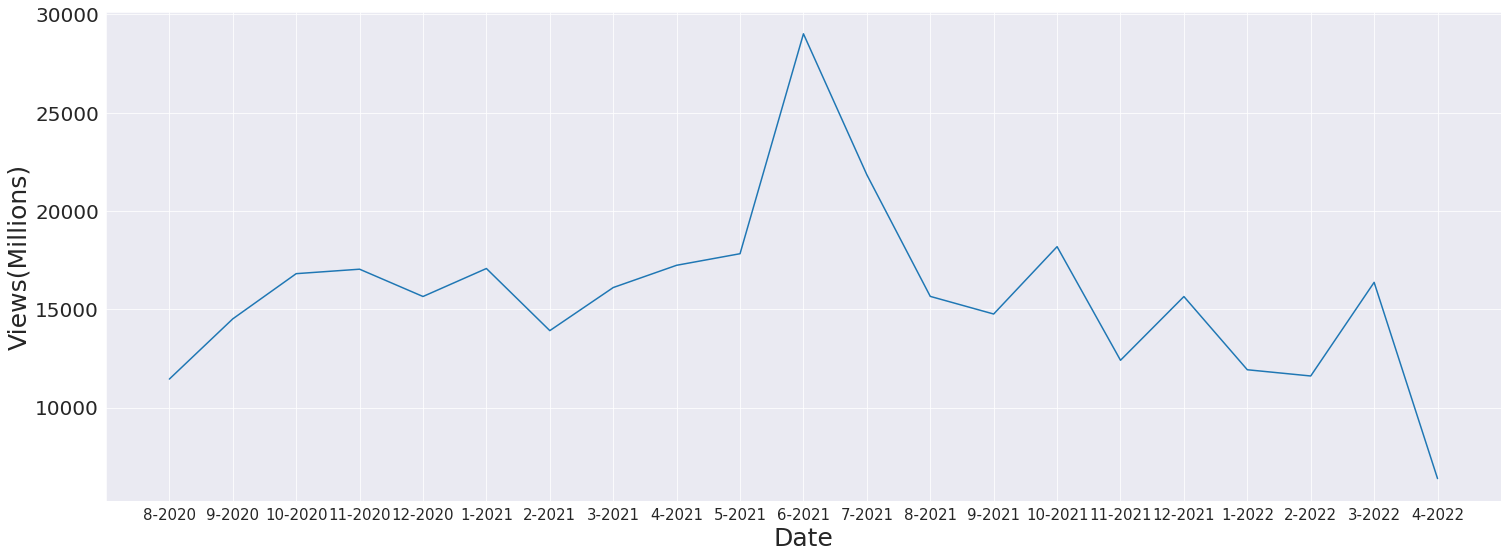

In [83]:

#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=25)    # fontsize of the x and y labels
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=20)
#plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
matplotlib.rcParams['figure.figsize'] = (25, 9)
plt.xlabel('Date'); plt.ylabel('Views(Millions)');
plt.plot(USTrends_Graph1.month_year2,USTrends_Graph1.view_count)


We see similar trends for the comments and likes:

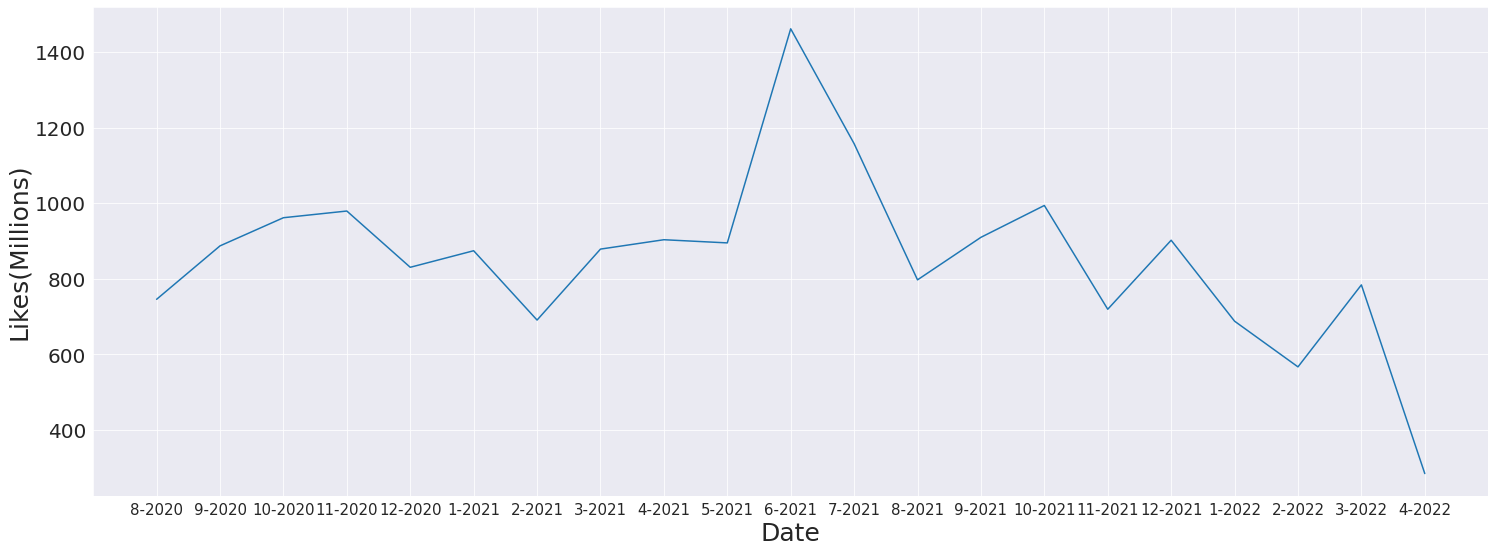

In [36]:

#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=25)    # fontsize of the x and y labels
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=20)
#plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
matplotlib.rcParams['figure.figsize'] = (25, 9)
plt.xlabel('Date'); plt.ylabel('Likes(Millions)');
plt.plot(USTrends_Graph1.month_year2,USTrends_Graph1.likes)


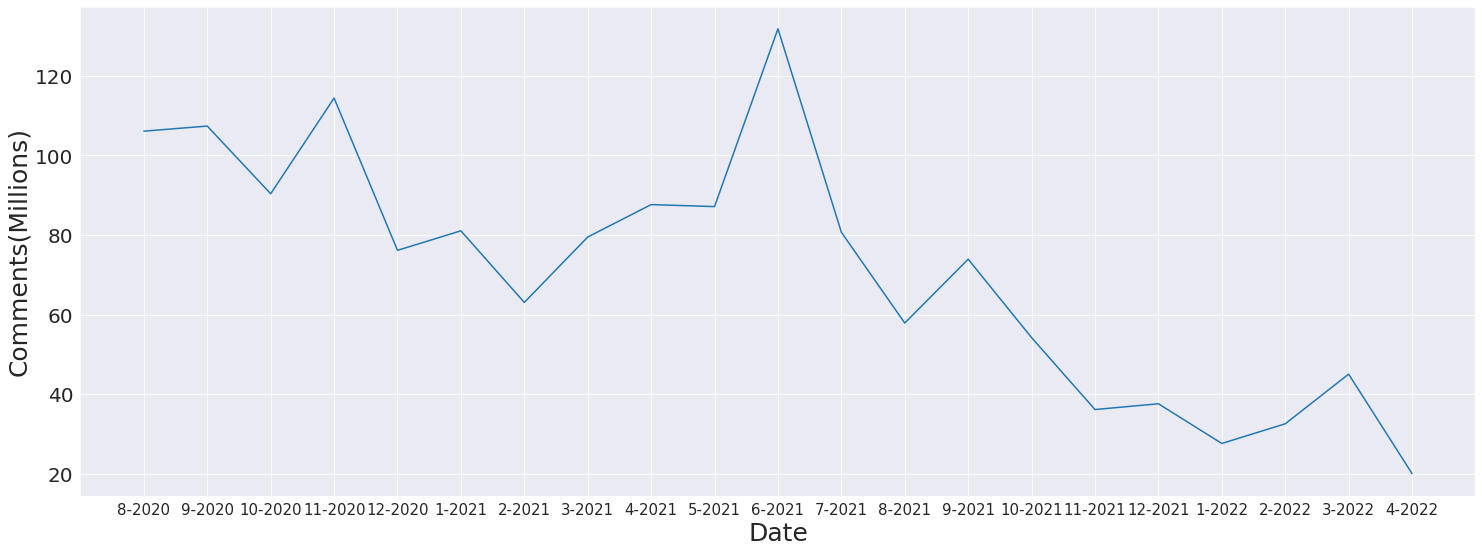

In [37]:
#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=25)    # fontsize of the x and y labels
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=20)
#plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
matplotlib.rcParams['figure.figsize'] = (25, 9)
plt.xlabel('Date'); plt.ylabel('Comments(Millions)');
plt.plot(USTrends_Graph1.month_year2,USTrends_Graph1.comment_count)


We have seen with these graphs how views, comments and likes have evolved in the last months. However, since this is only for trending videos, it is not especially interesting as a reference for total Youtube statistics

In any case,we can see that the 3 previous graphs have similar trends. It is  logical to think that comments, views, and likes are correlated (the most views, more likes and comments). Let's see if it is true.

For that, we are going to display scatter plots with the evolution of the comments and likes in function of the views. We are going to see as well the evolution of the likes in function of the comments.

<AxesSubplot:xlabel='view_count', ylabel='comment_count'>

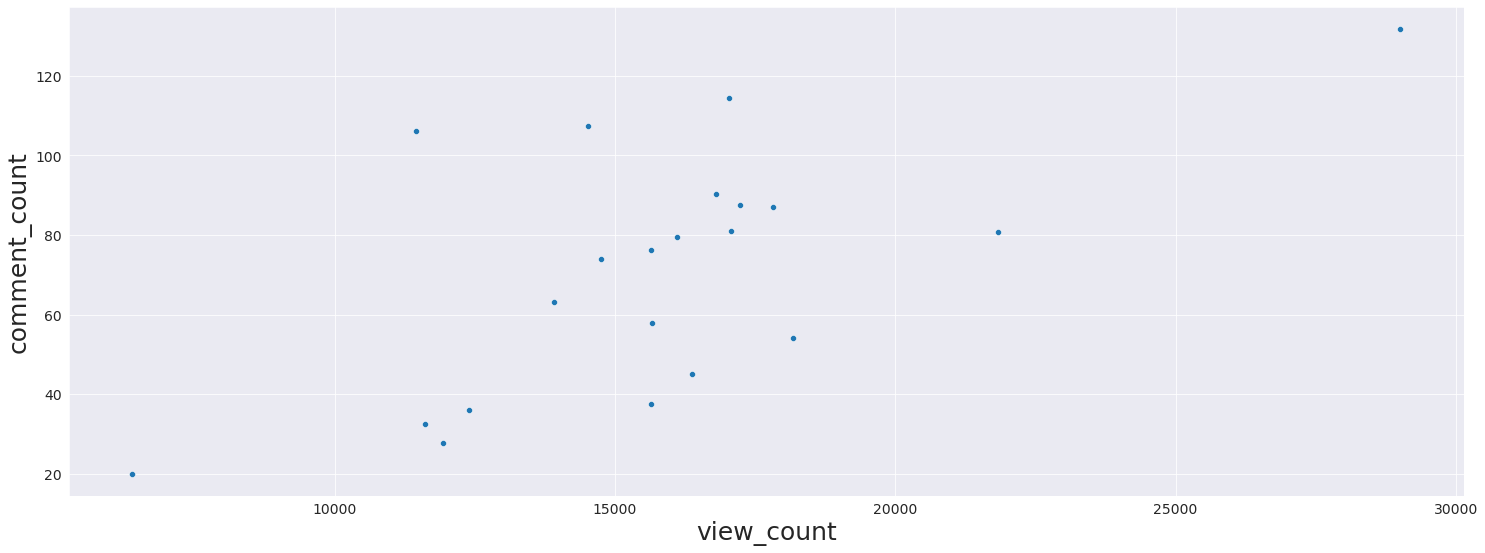

In [38]:
sns.scatterplot(x=USTrends_Graph1.view_count, y=USTrends_Graph1.comment_count)

<AxesSubplot:xlabel='view_count', ylabel='likes'>

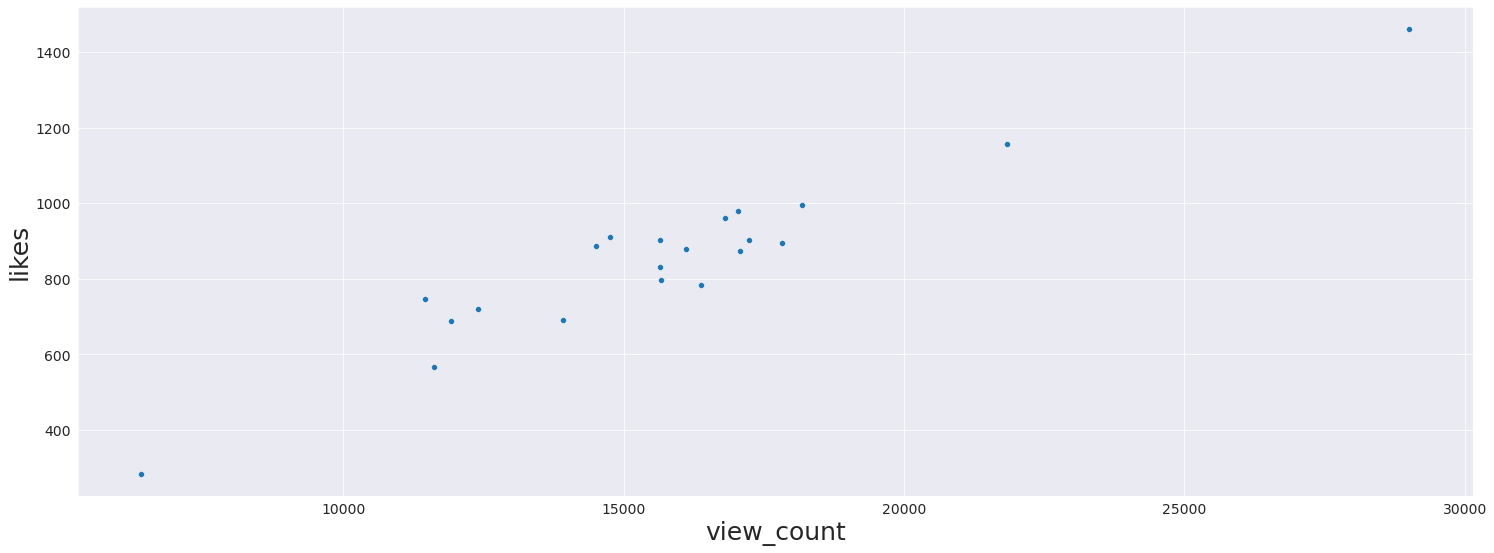

In [39]:
sns.scatterplot(x=USTrends_Graph1.view_count, y=USTrends_Graph1.likes)

<AxesSubplot:xlabel='comment_count', ylabel='likes'>

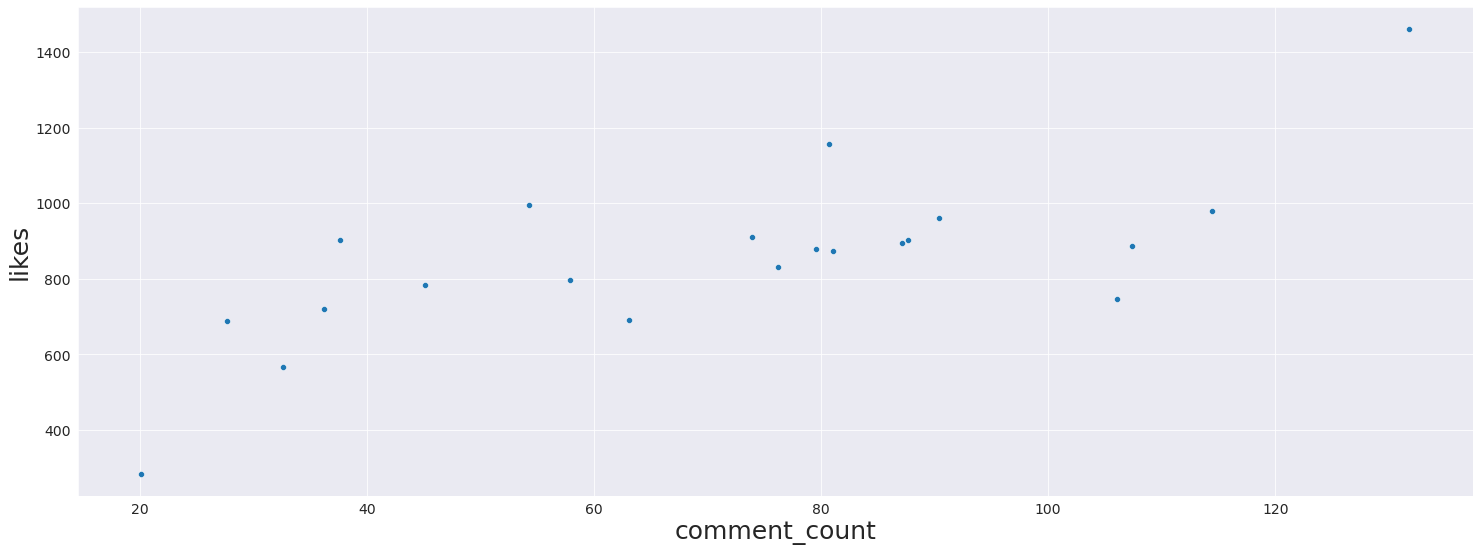

In [40]:
sns.scatterplot(x=USTrends_Graph1.comment_count, y=USTrends_Graph1.likes)

We can see there is a clear linear relation between views and likes, but it is not so clear between views and comments. It also seems to be a more or less close relation between likes and comments , but it is not specially clear.

To have a better idea of these relations, let's represent a linear regression to mathematically see how close we are from a linear relation between these fields. For that, were are going to use a Numpy function that returns the parameters of the regression lineal function.

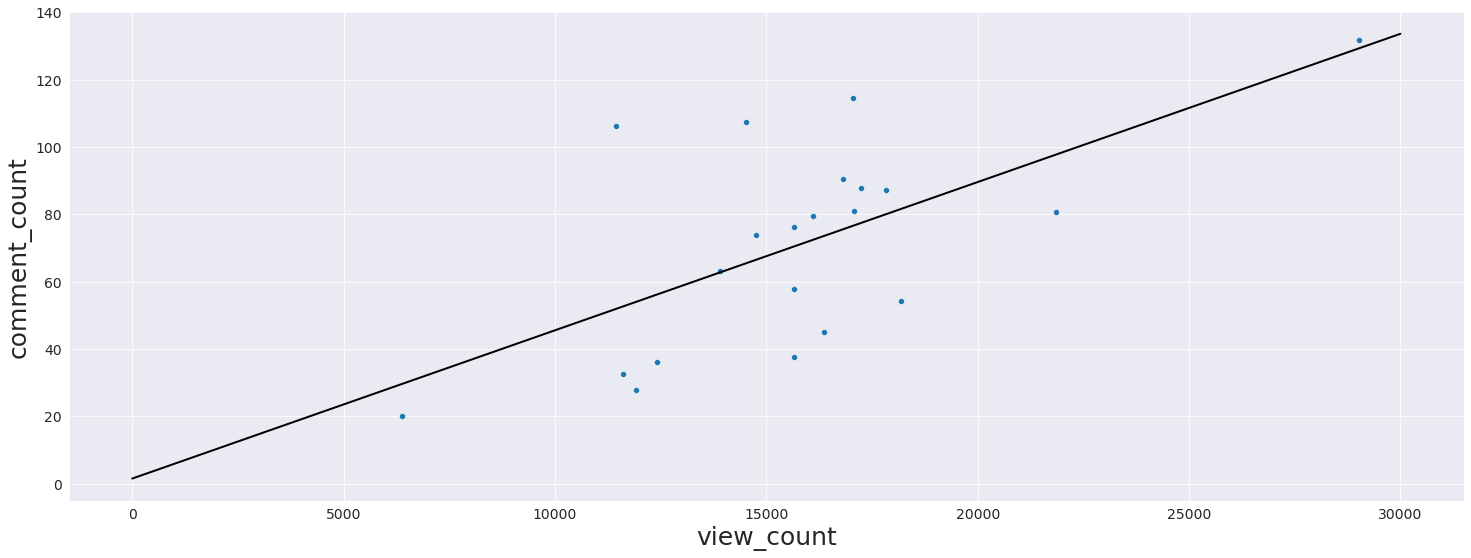

In [41]:
b, a = np.polyfit(USTrends_Graph1.view_count, USTrends_Graph1.comment_count, deg=1)
xseq = np.linspace(0, 30000, num=100)

sns.scatterplot(x=USTrends_Graph1.view_count, y=USTrends_Graph1.comment_count)
matplotlib.rcParams['figure.figsize'] = (25, 9)
plt.plot(xseq, a + b * xseq, color="k", lw=2)

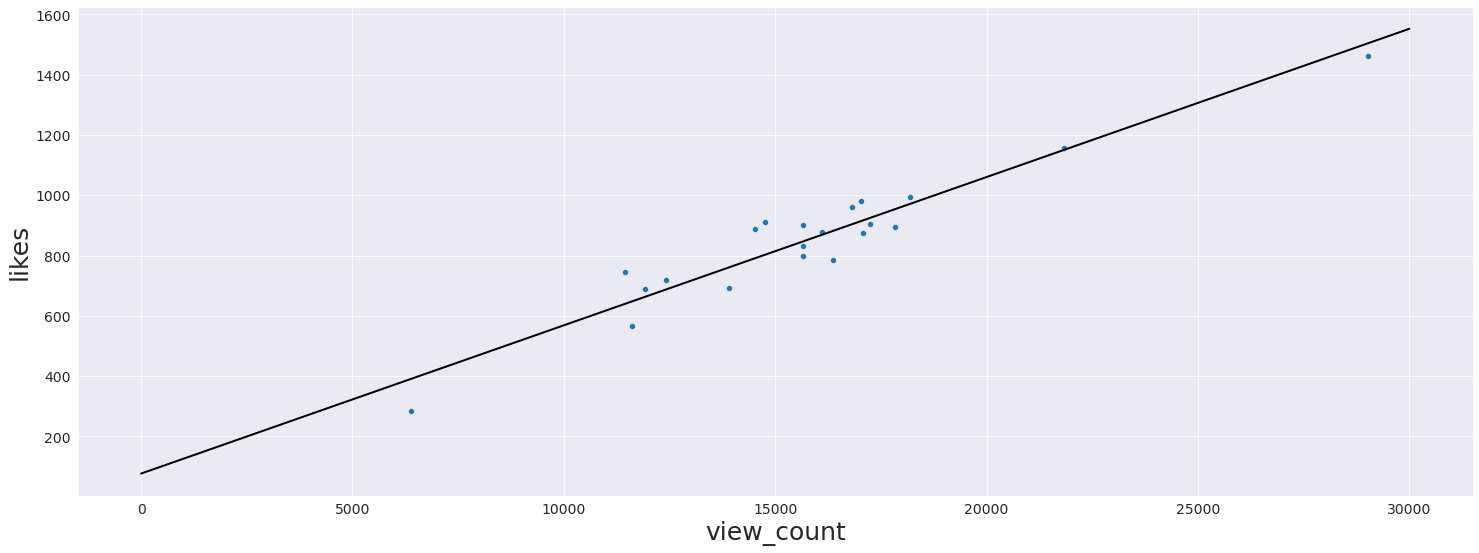

In [42]:
b, a = np.polyfit(USTrends_Graph1.view_count, USTrends_Graph1.likes, deg=1)
xseq = np.linspace(0, 30000, num=100)

sns.scatterplot(x=USTrends_Graph1.view_count, y=USTrends_Graph1.likes)
matplotlib.rcParams['figure.figsize'] = (25, 9)
plt.plot(xseq, a + b * xseq, color="k", lw=2)

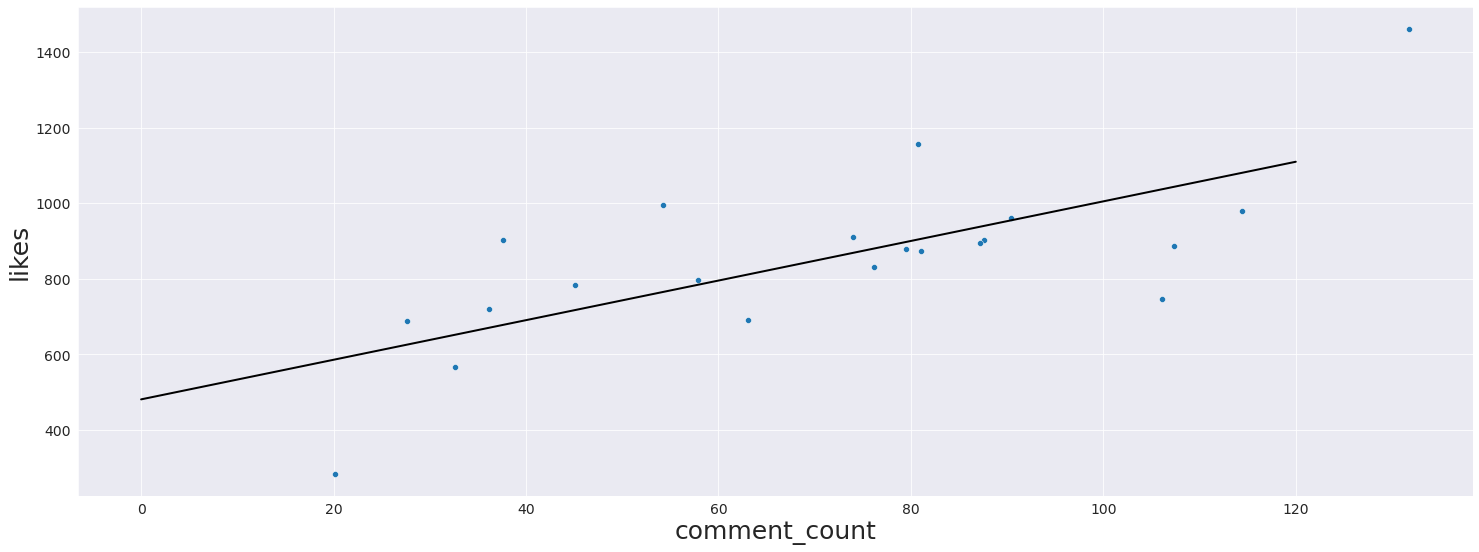

In [43]:
b, a = np.polyfit(USTrends_Graph1.comment_count, USTrends_Graph1.likes, deg=1)
xseq = np.linspace(0, 120, num=100)

sns.scatterplot(x=USTrends_Graph1.comment_count, y=USTrends_Graph1.likes)
matplotlib.rcParams['figure.figsize'] = (25, 9)
plt.plot(xseq, a + b * xseq, color="k", lw=2)

With the regression line, we see there is a clear linear relation between likes and views. There is also a linear relation between comment_count and likes, but less clear that between likes and views. There is much more dispersion between comments and views. We could objectively quantify the relation calculating the R-square, but that's beyond this analysis.

In conclusion, we can say that the more views there are in a Youtube videos, the more likes it is going to have. However, not necessarily having more views implies having more comments. We can also say that, generally, videos with more comments are going to have more likes.

Now we are going to explore data about the categories. Let's first see which category has the most views in this US trending video dataset. For that, we will need to group the views by category

In [44]:
USTrendsM_Cat=USTrendsM.groupby('category')[['view_count', 'likes', 'dislikes','comment_count']].sum()

In [45]:
USTrendsM_Cat['category']=USTrendsM_Cat.index

In [46]:
USTrendsM_Cat["view_count"]=USTrendsM_Cat["view_count"]/1000000
USTrendsM_Cat["comment_count"]=USTrendsM_Cat["comment_count"]/1000000
USTrendsM_Cat["likes"]=USTrendsM_Cat["likes"]/1000000

In [47]:
USTrendsM_Cat

,view_count,likes,dislikes,comment_count,category
category,,,,,
Autos & Vehicles,2292.744980,104.263247,1408858,8.921948,Autos & Vehicles
Comedy,13536.599125,960.243494,11174623,45.476881,Comedy
Education,5804.664950,333.021079,4040488,18.692810,Education
Entertainment,80069.662146,4128.836786,62549431,257.773356,Entertainment
Film & Animation,11177.499867,516.442914,6686643,36.912192,Film & Animation
Gaming,45945.600090,2522.862719,38395646,191.964327,Gaming
Howto & Style,5515.347009,281.445544,7266989,20.907838,Howto & Style
Music,93929.110508,6308.772837,106002834,703.441842,Music
News & Politics,9440.462684,119.752539,9979392,30.638562,News & Politics


In the following bar plot, we can see that the most view category in the US is Music, closely followed by Entertainment. Then we have Gaming. The rest of the categories are very far from the top 3.

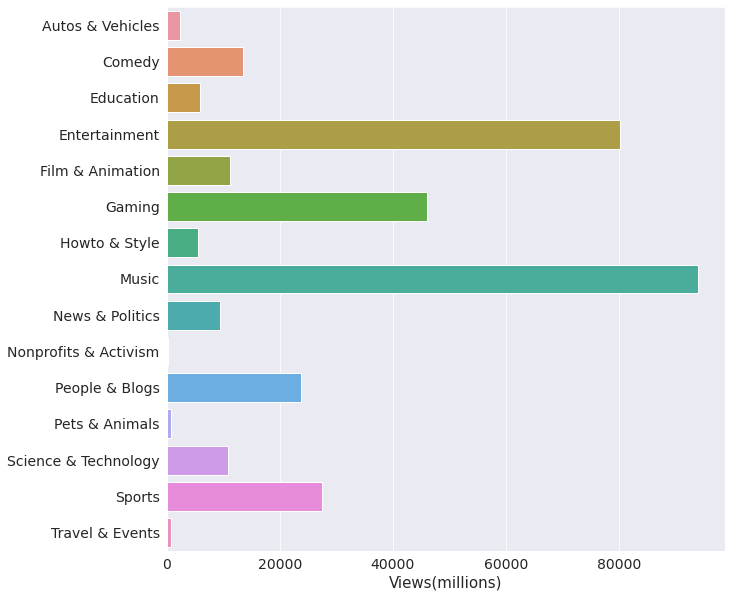

In [48]:
matplotlib.rcParams['figure.figsize'] = (10, 10)

p=sns.barplot(x="view_count", y="category",  data=USTrendsM_Cat);
p.set_xlabel("Views(millions)",fontsize = 15);
p.set_ylabel("");

Are the top viewed categories different in other countries? Let's compare with the UK dataset

In [49]:
UKTrendsM_Cat=UKTrendsM.groupby('category')[['view_count', 'likes', 'dislikes','comment_count']].sum()

In [50]:
UKTrendsM_Cat['category']=UKTrendsM_Cat.index

In [51]:
UKTrendsM_Cat["view_count"]=UKTrendsM_Cat["view_count"]/1000000
UKTrendsM_Cat["comment_count"]=UKTrendsM_Cat["comment_count"]/1000000
UKTrendsM_Cat["likes"]=UKTrendsM_Cat["likes"]/1000000

We can see in the following graph that the UK has very similar results. However, top 1 category in the UK is entertainment, not Music, which is top 2.

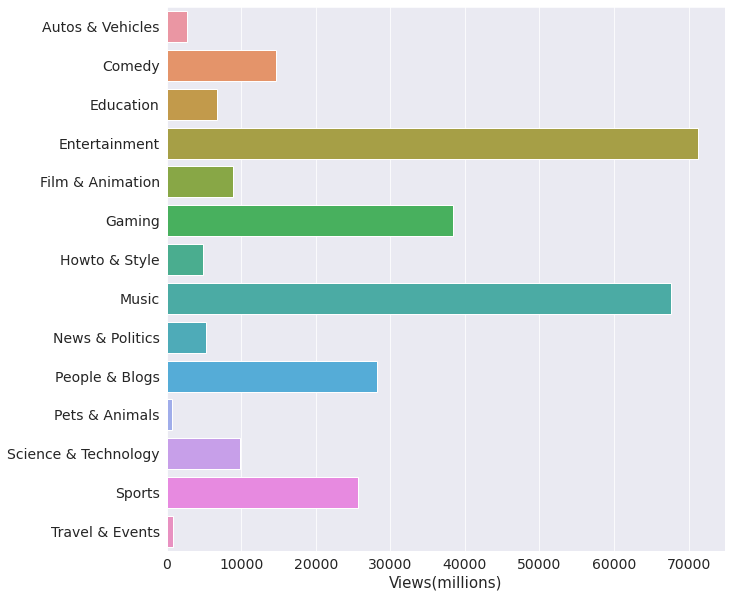

In [52]:
matplotlib.rcParams['figure.figsize'] = (10, 10)

p=sns.barplot(x="view_count", y="category",  data=UKTrendsM_Cat);
p.set_xlabel("Views(millions)",fontsize = 15);
p.set_ylabel("");

In [53]:
USTrendsM_Cat["country"]="US"
UKTrendsM_Cat["country"]="UK"

In [54]:
ConcatTrends=pd.concat([USTrendsM_Cat,UKTrendsM_Cat])

In any case, we are going to display the data for both countries in the same bar plot so it is easier to compare. We see very similar data overall. 

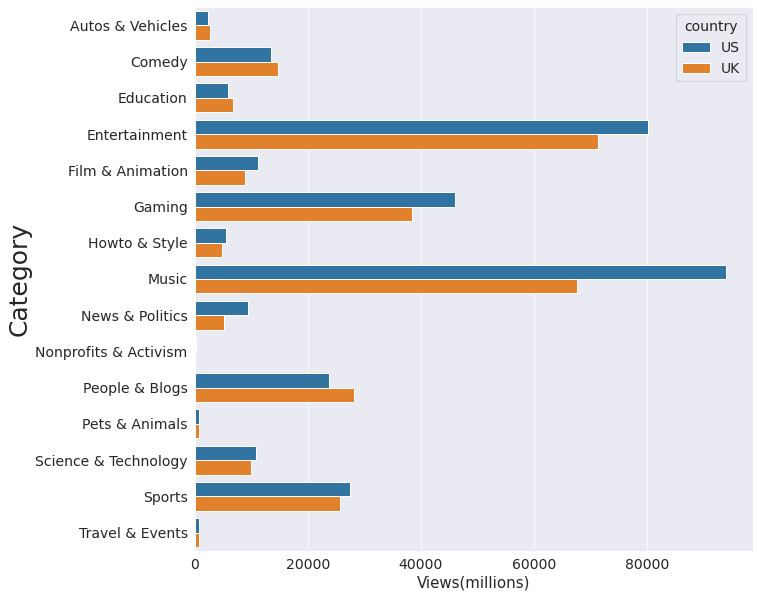

In [55]:
p=sns.barplot(x="view_count", y="category",hue='country',  data=ConcatTrends);
p.set_xlabel("Views(millions)",fontsize = 15);
p.set_ylabel("Category");

We have seen that the top categories are very similar in the UK and the US. However, for further analysis, it would be interesting to compare it with other countries, especially with countries have more cultural differences.

Let us save and upload our work to Jovian before continuing

In [56]:
import jovian

In [84]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "e-lasarte-z/zerotopandas-youtube-trends" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/e-lasarte-z/zerotopandas-youtube-trends


'https://jovian.ai/e-lasarte-z/zerotopandas-youtube-trends'

## Asking and Answering Questions

Here we are going to answer relevant questions about the Youtube trending videos dataset



### What are the categories of the top 10 most viewed videos?

We have seen what are the most viewed categories. We are going go more low level and focus in the most viewed videos. The categories of the most view videos should be the similar to the most view categories. Let's find out if it is true

In [58]:
a_list = list(range(1, 10))
USTop=USTrendsM.sort_values('view_count', ascending=False).head(10)
UKTop=UKTrendsM.sort_values('view_count', ascending=False).head(10)
USTop["Ranking"]=list(range(1, 11))
UKTop["Ranking"]=list(range(1, 11))
USTop["Ranking"]=USTop["Ranking"].astype(str)
UKTop["Ranking"]=UKTop["Ranking"].astype(str)

USTop["country"]="US"
UKTop["country"]="UK"
USTop["view_count"]=USTop["view_count"]/1000000
USTop["comment_count"]=USTop["comment_count"]/1000000
USTop["likes"]=USTop["likes"]/1000000
UKTop["view_count"]=UKTop["view_count"]/1000000
UKTop["comment_count"]=UKTop["comment_count"]/1000000
UKTop["likes"]=UKTop["likes"]/1000000
ConcatTop=pd.concat([USTop,UKTop])

In the following bar plot we have the categories of the most viewed videos in the US and the UK. As we expected, all the categories are Entertainment and Music.

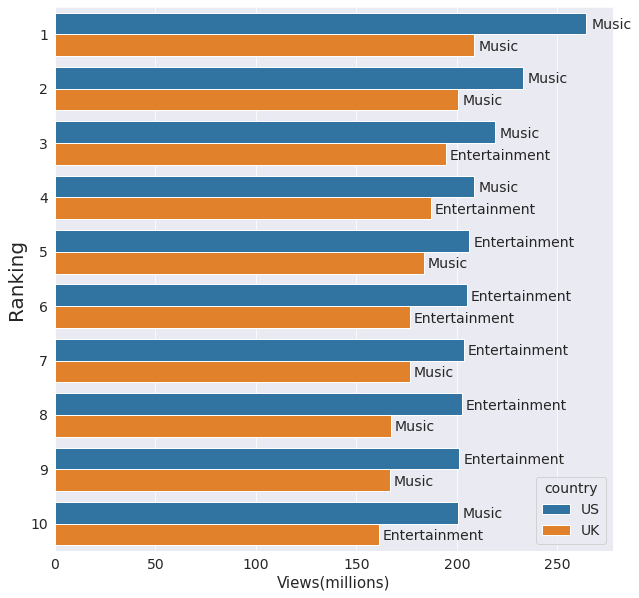

In [59]:

p=sns.barplot(x="view_count", y="Ranking",hue='country',data=ConcatTop);
p.set_xlabel("Views(millions)",fontsize = 15);
p.set_ylabel("Ranking",fontsize = 20);

for i in USTop.index:
    category = USTop.loc[i, "category"]
    views= USTop.loc[i, "view_count"]
    y = int(USTop.loc[i, "Ranking"])
    plt.annotate(category, (views+views/100, y-1.3), ha="left", va="top")
    
for i in UKTop.index:
    category = UKTop.loc[i, "category"]
    views= UKTop.loc[i, "view_count"]
    y = int(UKTop.loc[i, "Ranking"])
    plt.annotate(category, (views+views/100, y-0.9), ha="left", va="top")
#sns.set(rc = {'figure.figsize':(15,8)})


We see that the top videos in the US and UK are from the same categories, entertainment and music. Also we can see here that, as expected, the top videos have more views in the US than in the UK.

### What are the video category that has more reactions  in the US?

We have seen which are the categories in the trending videos with the most views. But what are the categories of videos, that, after watching them, give more positive or negative reactions? To answer this question, we are going to check the like/view, dislike/view, and comment/view ratios

In [60]:
USTrendsM_Cat["like/view"]=USTrendsM_Cat["likes"]/USTrendsM_Cat["view_count"]
USTrendsM_Cat["dislike/view"]=USTrendsM_Cat["dislikes"]/USTrendsM_Cat["view_count"]/1000000
USTrendsM_Cat["comment/view"]=USTrendsM_Cat["comment_count"]/USTrendsM_Cat["view_count"]



In the following plot, we see that Music and Entertainment are not anymore top 1 and 2 for likes/views. This means that these video categories are not the ones that generate more reactions. The category that does it is Comedy. Music is top 2, but many other categories are very close.

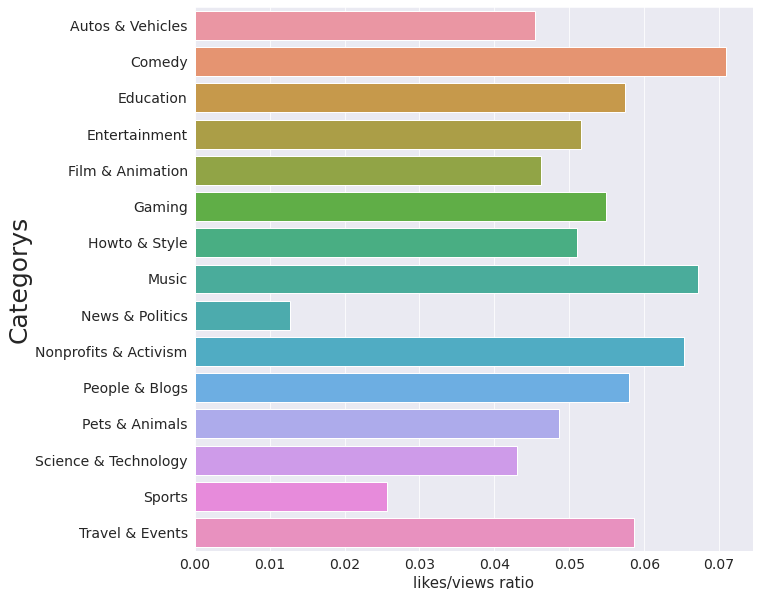

In [61]:
matplotlib.rcParams['figure.figsize'] = (10, 10)

p=sns.barplot(x="like/view", y="category",  data=USTrendsM_Cat);
p.set_xlabel("likes/views ratio",fontsize = 15);
p.set_ylabel("Categorys");

In the following bar plot we see that People & Blogs is the category that has a higher dislike/view ratio, followed by how to & style, and news and politics. This means that these are the categories that generate more negative reactions.

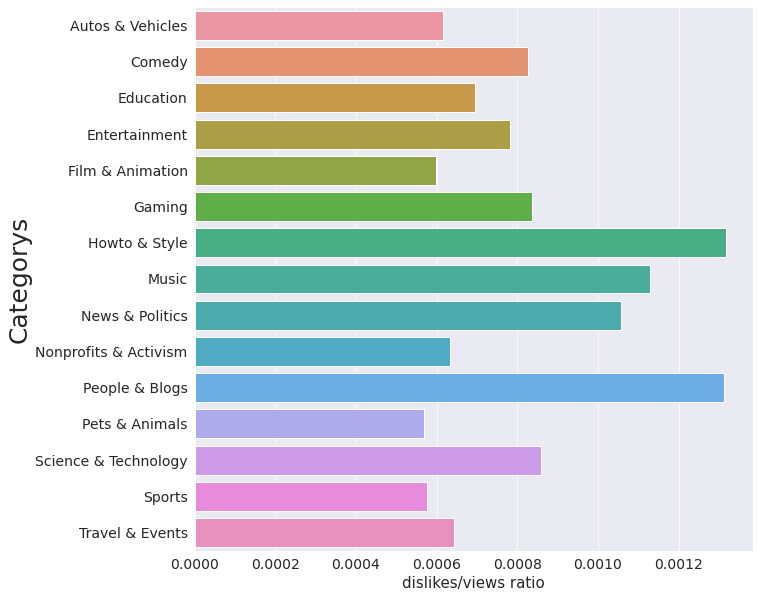

In [62]:
matplotlib.rcParams['figure.figsize'] = (10, 10)

p=sns.barplot(x="dislike/view", y="category",  data=USTrendsM_Cat);
p.set_xlabel("dislikes/views ratio",fontsize = 15);
p.set_ylabel("Categorys");

Let's see which categories make the user to have more interaction with the videos. For that, we are going to analyze the comment/view ratio.

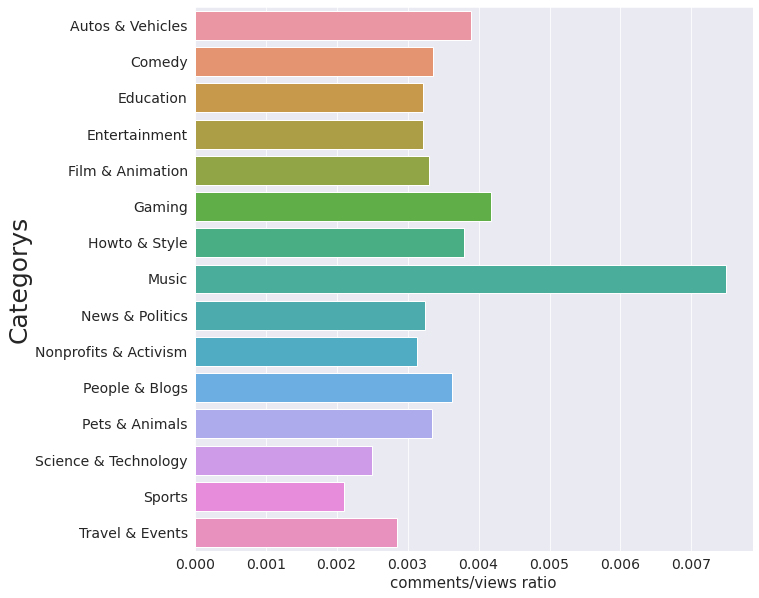

In [63]:
matplotlib.rcParams['figure.figsize'] = (10, 10)

p=sns.barplot(x="comment/view", y="category",  data=USTrendsM_Cat);
p.set_xlabel("comments/views ratio",fontsize = 15);
p.set_ylabel("Categorys");

The results are interesting. Music is by far the category where the users make more comments. The rest have similar values, and generate less than half comments than music.

### What are the view, comment and like trending and relations in UK?

We have seen before how the views, comments, and likes were trending in US, and also its relation, but we haven't make that analysis for the UK. Are these trends similar in the UK? We are going to display the same graphs than in the previous section, but including the UK:

In [64]:
UKTrendsM_Month=UKTrendsM.groupby('Month_year')[['view_count', 'likes', 'dislikes','comment_count']].sum()
UKTrendsM_Month["month_year2"]=UKTrendsM_Month.index
UKTrendsM_Month["month"]=UKTrendsM_Month["month_year2"].str[:2]
UKTrendsM_Month["month"]=UKTrendsM_Month["month"].str.replace("-","")
UKTrendsM_Month["year"]=UKTrendsM_Month["month_year2"].str[-4:]
UKTrendsM_Month["year"]=UKTrendsM_Month["year"].astype(int)
UKTrendsM_Month["month"]=UKTrendsM_Month["month"].astype(int)
UKTrendsM_Month["view_count"]=UKTrendsM_Month["view_count"]/1000000
UKTrendsM_Month["comment_count"]=UKTrendsM_Month["comment_count"]/1000000
UKTrendsM_Month["likes"]=UKTrendsM_Month["likes"]/1000000
UKTrends_Graph1=UKTrendsM_Month.sort_values(by=["year","month"])

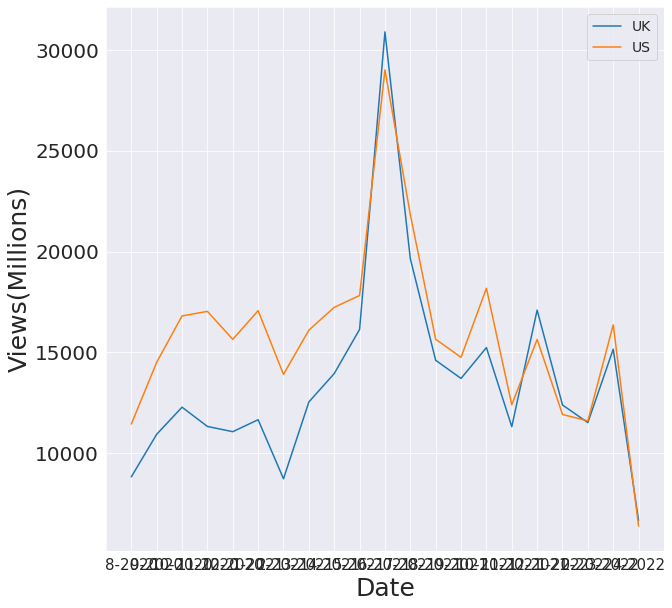

In [65]:
#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=25)    # fontsize of the x and y labels
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=20)
#plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
matplotlib.rcParams['figure.figsize'] = (25, 9)
plt.xlabel('Date'); plt.ylabel('Views(Millions)');
plt.plot(UKTrends_Graph1.month_year2,UKTrends_Graph1.view_count)
plt.plot(USTrends_Graph1.month_year2,USTrends_Graph1.view_count)
plt.legend(['UK', 'US']);

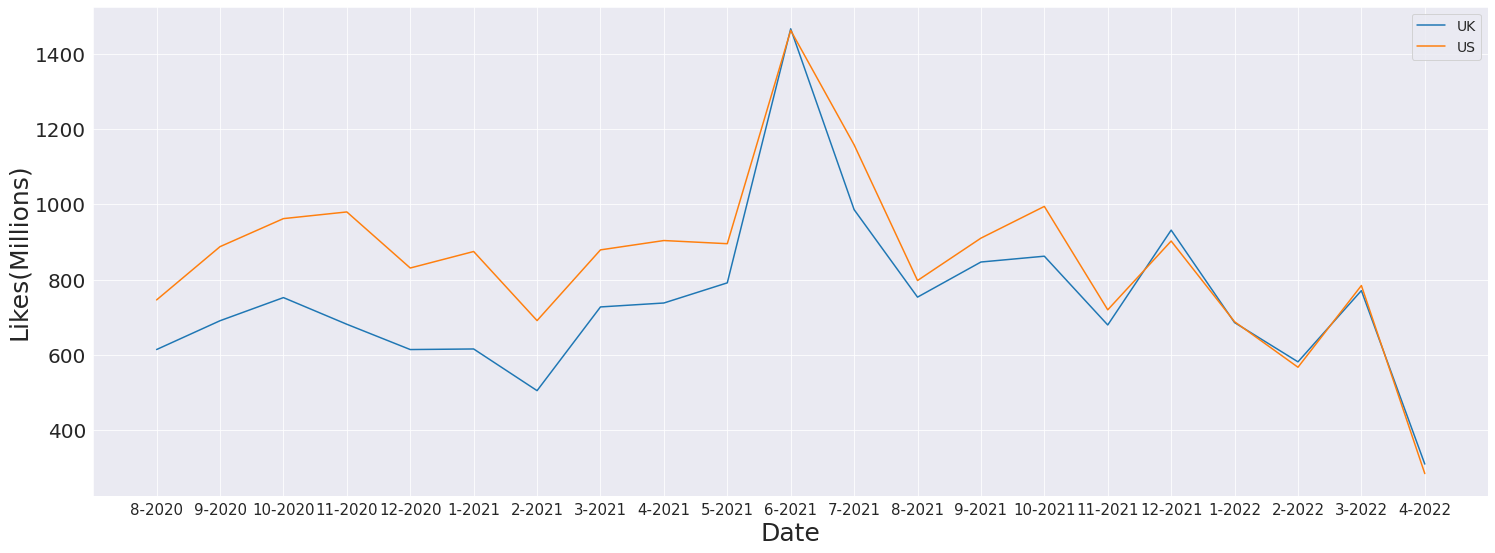

In [66]:
#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=25)    # fontsize of the x and y labels
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=20)
#plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
matplotlib.rcParams['figure.figsize'] = (25, 9)
plt.xlabel('Date'); plt.ylabel('Likes(Millions)');
plt.plot(UKTrends_Graph1.month_year2,UKTrends_Graph1.likes)
plt.plot(USTrends_Graph1.month_year2,USTrends_Graph1.likes)
plt.legend(['UK', 'US']);

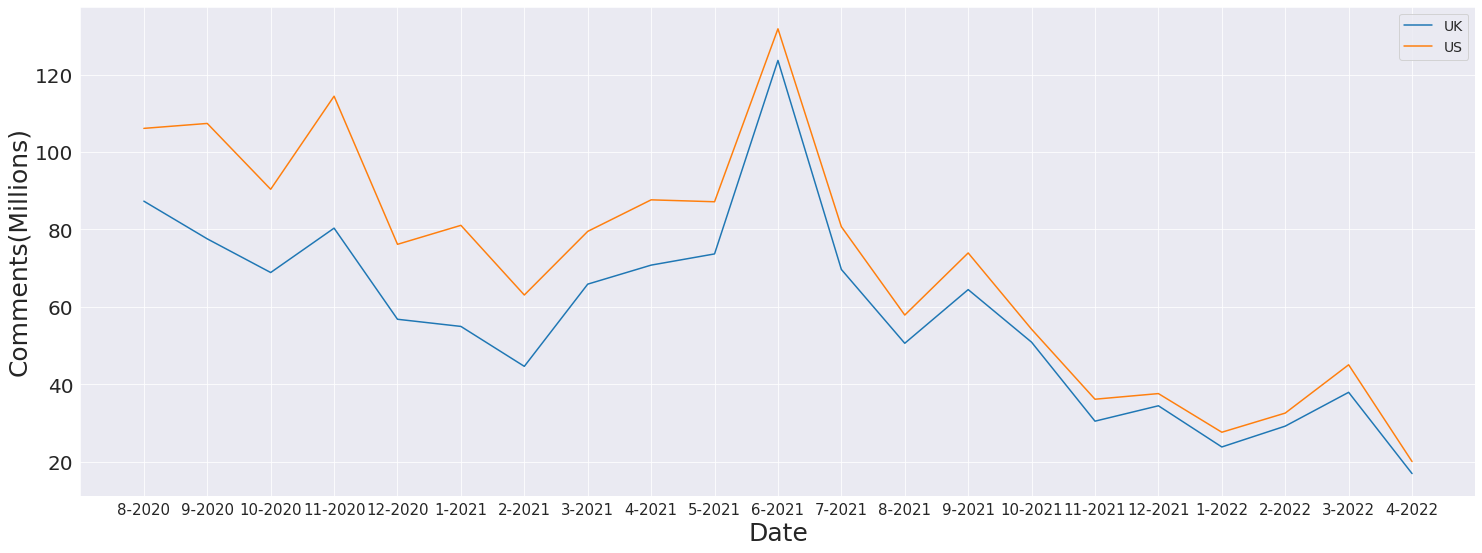

In [67]:
#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=25)    # fontsize of the x and y labels
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=20)
#plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
matplotlib.rcParams['figure.figsize'] = (25, 9)
plt.xlabel('Date'); plt.ylabel('Comments(Millions)');
plt.plot(UKTrends_Graph1.month_year2,UKTrends_Graph1.comment_count)
plt.plot(USTrends_Graph1.month_year2,USTrends_Graph1.comment_count)
plt.legend(['UK', 'US']);

1.4913450223586795 0.004403378640849004 19.702778641014994 0.002797631530464699


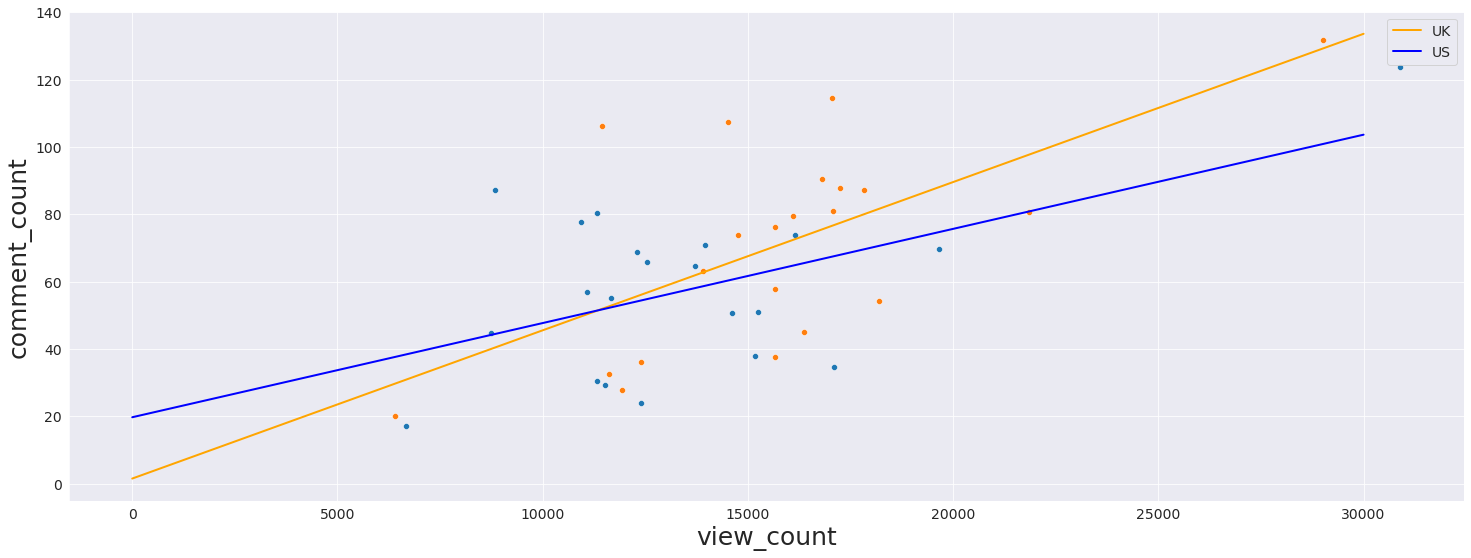

In [68]:
b, a = np.polyfit(USTrends_Graph1.view_count, USTrends_Graph1.comment_count, deg=1)
xseq = np.linspace(0, 30000, num=100)
d, c = np.polyfit(UKTrends_Graph1.view_count, UKTrends_Graph1.comment_count, deg=1)

print(a,b,c,d)


sns.scatterplot(x=UKTrends_Graph1.view_count, y=UKTrends_Graph1.comment_count,)
sns.scatterplot(x=USTrends_Graph1.view_count, y=USTrends_Graph1.comment_count)
plt.plot(xseq, a + b * xseq, color="orange", lw=2)
plt.plot(xseq, c + d * xseq, color="blue", lw=2)
plt.legend(['UK', 'US']);



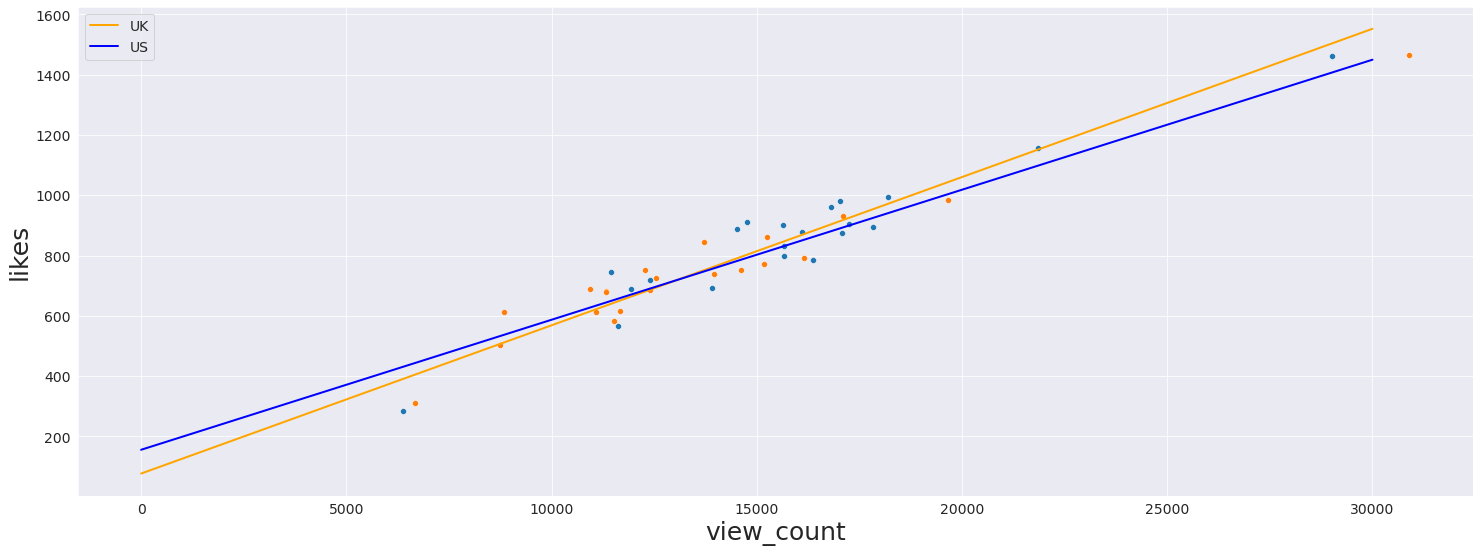

In [69]:
b, a = np.polyfit(USTrends_Graph1.view_count, USTrends_Graph1.likes, deg=1)
d, c = np.polyfit(UKTrends_Graph1.view_count, UKTrends_Graph1.likes, deg=1)
xseq = np.linspace(0, 30000, num=100)

sns.scatterplot(x=USTrends_Graph1.view_count, y=USTrends_Graph1.likes)
sns.scatterplot(x=UKTrends_Graph1.view_count, y=UKTrends_Graph1.likes)
matplotlib.rcParams['figure.figsize'] = (25, 9)
plt.plot(xseq, a + b * xseq, color="orange", lw=2)
plt.plot(xseq, c + d * xseq, color="blue", lw=2)
plt.legend(['UK', 'US']);


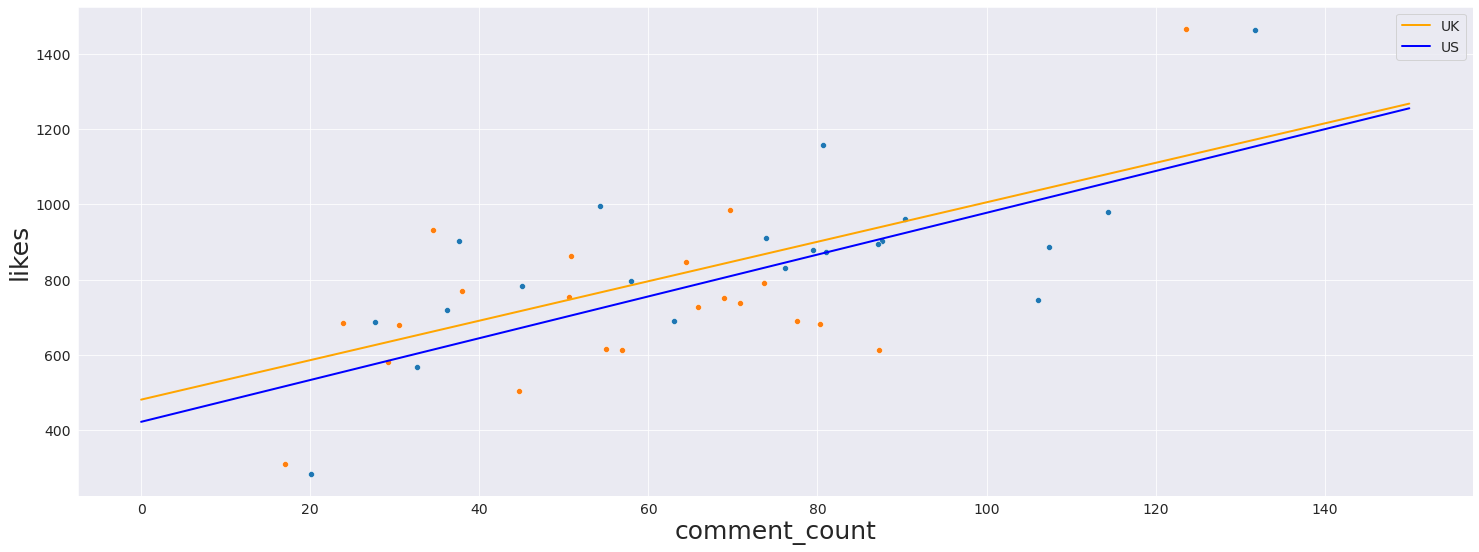

In [70]:
b, a = np.polyfit(USTrends_Graph1.comment_count, USTrends_Graph1.likes, deg=1)
d, c = np.polyfit(UKTrends_Graph1.comment_count, UKTrends_Graph1.likes, deg=1)
xseq = np.linspace(0, 150, num=100)

sns.scatterplot(x=USTrends_Graph1.comment_count, y=USTrends_Graph1.likes)
sns.scatterplot(x=UKTrends_Graph1.comment_count, y=UKTrends_Graph1.likes)
matplotlib.rcParams['figure.figsize'] = (25, 9)
plt.plot(xseq, a + b * xseq, color="orange", lw=2)
plt.plot(xseq, c + d * xseq, color="blue", lw=2)
plt.legend(['UK', 'US']);

We see that the trends and relations are very similar between the US and the UK

### What were the most used tags in US in the last month?

One of the fields in the analyzed dataset are the tags that the persons that upload the videos to Youtube assign to their videos. Youtube uses these tags to filter the videos when a user makes a search. This info may be useful to know what topics are trending. We going to analyze only last month data, since there is a lot of data and it would take too much time if we try to use more data.

In order to do that, we are going to create a Pandas dataframe where we are going to insert all the tags. There can be several tags in one row, and all of them are separated by "|" character. We are going to use some loops and the "split" method to separate the tags in each row and insert them into the new dataframe. Then, we are going to group them using the pivot_table method.

In [71]:
tags={'Tag':[]}

In [72]:
tags=pd.DataFrame(tags)

In [73]:
UStags=USTrendsM[USTrendsM.year==2022][USTrendsM.month==3]

/tmp/ipykernel_516/559865641.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  UStags=USTrendsM[USTrendsM.year==2022][USTrendsM.month==3]


In [74]:
import csv
aux=0
for i in UStags['tags']:
    stri=i.split("|")
    for j in stri:
        tags.loc[aux]=[j]
        aux=aux+1

In [75]:
tagsagg = tags.pivot_table(columns=['Tag'],aggfunc='size')

In [76]:
tagsagg.sort_values(ascending=False).head(20)

Tag
[None]                  1455
funny                    295
minecraft                265
news                     190
comedy                   183
Minecraft                142
video                    136
ukraine                  128
russia                   120
gaming                   119
elden ring               117
minecraft challenge      116
fortnite                 110
tiktok                   106
Russia                   103
hermitcraft season 9     102
Ukraine                   94
Records                   91
challenge                 90
2022                      83
dtype: int64

We can see that in March 2022, the most used tag in the trending videos is "funny" (without counting the category of videos without tags). We can also identify some current issues, like Ukraine war, or the launch of the video game "Elden Ring"

Let us save and upload our work to Jovian before continuing.

In [77]:
import jovian

In [78]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "e-lasarte-z/zerotopandas-youtube-trends" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/e-lasarte-z/zerotopandas-youtube-trends


'https://jovian.ai/e-lasarte-z/zerotopandas-youtube-trends'

## Inferences and Conclusion


We have seen in this project some interesting insights about youtube trending videos. We have analyzed the relation between the comments, likes, and views. It is interesting to notice that more views imply more likes, but not necessarily more comments. 
We have also compared the trends between UK and US, and we have seen that there are very similar. This means that Americans and British have similar behavior on youtube.


We have also investigated which are the most viewed categories, and which categories generate the most positive and negative reactions. This data may be useful for Youtube content creators. It may be interesting as well to have insights into the population's preferences.

Finally, we have also seen which are the most used tags, which give us an idea of the hottest topics.

In [79]:
import jovian

In [80]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "e-lasarte-z/zerotopandas-youtube-trends" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/e-lasarte-z/zerotopandas-youtube-trends


'https://jovian.ai/e-lasarte-z/zerotopandas-youtube-trends'

## References and Future Work

It is important to remark that this study has some limitations, but that could be overcome with some more work. We have compared only the trends between US and UK, and they are similar as we could expect due to the similar culture. It could be interesting to compare it with different countries. Data from other countries is also available in the Kaggle dataset that was downloaded.

Also, we only analyzed the most used tags for one month. Using a longer timeframe was making the execution time too slow. It could be interesting to improve the algorithm that was used to make it more efficient, or to look for alternatives methods to do the task.

In [81]:
import jovian

In [82]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "e-lasarte-z/zerotopandas-youtube-trends" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/e-lasarte-z/zerotopandas-youtube-trends


'https://jovian.ai/e-lasarte-z/zerotopandas-youtube-trends'